# Analyzing some data on IPO first-day trends
## authors: JLM, RCT

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize':16,
         'axes.titlesize':16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
pylab.rcParams.update(params)

## Loading Data

In [11]:
cols = ['date','issuer','Symbol','Managers','offer_price','opening_price',
        'day1_close','day1_Px_change','change_opening','change_close','rating','performed']

years = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]
data_IPO = {}

for year in years:
    data_IPO[year] = pd.read_excel('data_{}.xlsx'.format(year),skiprows=3,header=None,names=cols)

#data_IPO[2018] = pd.read_csv('IPO_data/data_2018.csv',skiprows=3,header=None,names=cols)
#data_IPO[2019] = pd.read_csv('IPO_data/data_2019.csv',skiprows=3,header=None,names=cols)
#data_IPO[2020] = pd.read_csv('IPO_data/data_2020.csv',skiprows=3,header=None,names=cols)

## Defining a couple of functions to edit dataframes

In [29]:
def rm_symbol_and_change_str_to_float(df,column,symbol):
    df[column] = df[column].str.replace(symbol,'',regex=True).astype(float)
    
def m_d_y(st,which):
    m = st[:st.find('/')]
    st = st[st.find('/')+1:]
    d = st[:st.find('/')]
    y = st = st[st.find('/')+1:]
    if which=='m':
        return int(m)
    elif which=='d':
        return int(d)
    else:
        return int(y)
    
def process_df(df):
#     rm_symbol_and_change_str_to_float(df,'offer_price','$')
#     rm_symbol_and_change_str_to_float(df,'opening_price','$')
#     rm_symbol_and_change_str_to_float(df,'day1_close','$')
#     rm_symbol_and_change_str_to_float(df,'day1_Px_change','%')
    df['month'] = df['date'].map(lambda element: m_d_y(element,'m'))
    df['day'  ] = df['date'].map(lambda element: m_d_y(element,'d'))

## Editing dataframes

In [30]:
for year in years:
    process_df(data_IPO[year])
data_IPO[years[0]].head(2)

AttributeError: 'Timestamp' object has no attribute 'find'

## Plotting correlation between offer, opening prices, and day 1 close

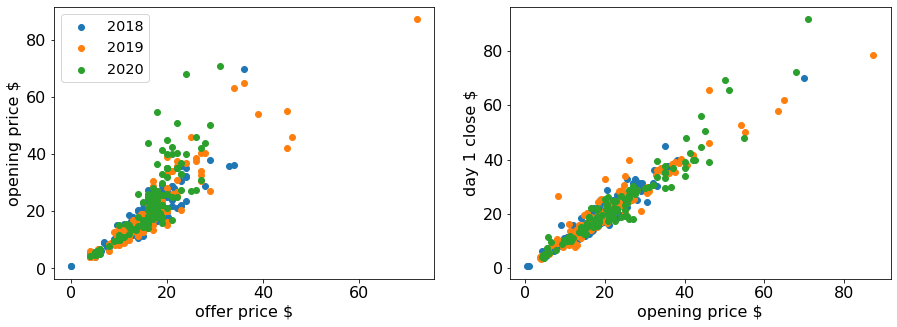

In [6]:
fig = plt.subplots(1,2,figsize=(15,5))

plt.subplot(1, 2, 1)

for year in years:
    plt.scatter(data_IPO[year]['offer_price'],data_IPO[year]['opening_price'],label='{}'.format(year))
plt.xlabel('offer price $')
plt.ylabel('opening price $')
plt.legend()

plt.subplot(1, 2, 2)
for year in years:
    plt.scatter(data_IPO[year]['opening_price'],data_IPO[year]['day1_close'])
plt.xlabel('opening price $')
plt.ylabel('day 1 close $')

plt.show()

## Plotting the day 1 percent change for different years

2010 : -0.0062
2011 : -0.0076
2012 : 0.0075
2013 : 0.0033
2014 : -0.0101
2015 : -0.0001
2016 : -0.0059
2017 : 0.0026
2018 : -0.0073
2019 : 0.0035
2020 : -0.007


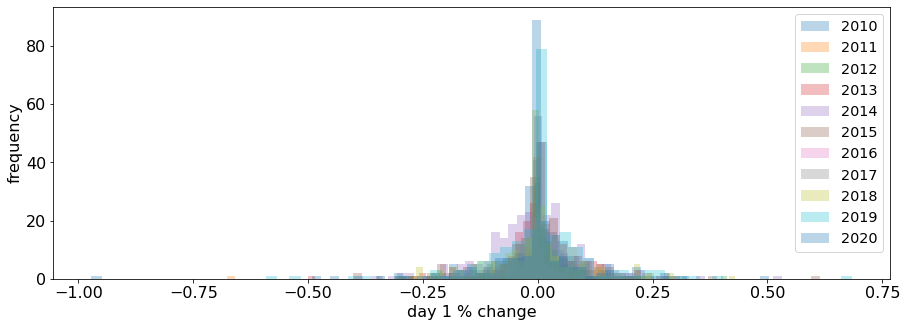

In [37]:
data_IPO_greater_than = {}
greater_than = 0.1

for y,year in enumerate(years):
    data_IPO[year]['day1_Px_change'] = (data_IPO[year].day1_close - data_IPO[year].opening_price)/data_IPO[year].day1_close
    data_IPO[year]['change_opening'] = data_IPO[year].day1_close - data_IPO[year].opening_price
    plt.hist(data_IPO[year]['day1_Px_change'],alpha = 0.3,label='{}'.format(year),bins=50)
    mean = data_IPO[year]['day1_Px_change'].mean()
    print(year, ":",round(mean,4))
    #looking at companies with greater than x growth
    data_IPO_greater_than[year] = data_IPO[year][(data_IPO[year]['day1_Px_change'] > greater_than)]
    #plt.plot([mean,mean],[0,100],label='{} average = {}'.format(year,mean),ls='--',lw=3, alpha = 0.3)

plt.xlabel('day 1 % change')
plt.ylabel('frequency')
plt.legend()

In [35]:

data_IPO_greater_than[2019].head(10)

,date,issuer,Symbol,Managers,offer_price,opening_price,day1_close,day1_Px_change,change_opening,change_close,rating,performed
14,2019-02-15,Hoth Therapeutics,HOTH,Laidlaw & Company (UK) Ltd.,5.6,6.90,8.53,0.191090,1.63,2.93,1,Missed
19,2019-02-28,Kaleido Biosciences,KLDO,Goldman Sachs/ J.P. Morgan/ Morgan Stanley,15.0,12.80,14.23,0.100492,1.43,-0.77,1,NaN
23,2019-03-07,ShockWave Medical,SWAV,Morgan Stanley/ BofA Merrill Lynch,17.0,24.80,30.50,0.186885,5.70,13.50,2,NaN
28,2019-03-20,UP Fintech Holding Limited,TIGR,Citigroup/ Deutsche Bank Securities,8.0,8.10,10.92,0.258242,2.82,2.92,2,NaN
43,2019-04-12,Jumia,JMIA,Morgan Stanley/ Citigroup/ Berenberg/ RBC Capi...,14.5,18.95,25.46,0.255695,6.51,10.96,1,Missed
45,2019-04-17,Turning Point Therapeutics,TPTX,Goldman Sachs/ SVB Leerink/ Wells Fargo Securi...,18.0,24.25,28.90,0.160900,4.65,10.90,2,NaN
52,2019-05-02,Beyond Meat,BYND,Goldman Sachs/ J.P. Morgan/ Credit Suisse,25.0,46.00,65.75,0.300380,19.75,40.75,3,NaN
62,2019-05-09,Cortexyme,CRTX,BofA Merrill Lynch/ Credit Suisse,17.0,20.00,32.89,0.391912,12.89,15.89,1,Missed
66,2019-05-09,NextCure,NXTC,"Morgan Stanley/ BofAMerrill Lynch, Pierce/ Pip...",15.0,15.50,19.90,0.221106,4.40,4.90,2,NaN
70,2019-05-10,Jiayin Group,JFIN,Roth Capital Partners/ Shenwan Hongyuan Securi...,10.5,11.00,16.15,0.318885,5.15,5.65,1,NaN


## Trying to find if there's a correlation between day 1 % change and month
(Need to include more years to try and see that)

In [28]:
for year in years:
    x = []
    y = []
    for month in range(1,13):
        x.append(month)
        y.append(data_IPO[year]['day1_Px_change'][data_IPO[year]['month']==month].mean())
    plt.plot(x,y,label='{}'.format(year))
plt.legend()
plt.ylabel('day 1 % change')
plt.xlabel('month')

KeyError: 'month'

## Loading the data as excel to try to avoid changing cell types
[ ] Adding a calculated column for % day change at day 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
column_names = ['date','issuer','Symbol','Managers','offer_price','opening_price',
        'day1_close','day1_Px_change','change_opening','change_close','rating','performed']
df = pd.read_excel('data_2019.xlsx', skiprows=2, names=column_names)

In [4]:
df['day1_Px_change'] = (df.day1_close - df.opening_price)/df.day1_close
df['change_opening'] = df.day1_close - df.opening_price
df.head()

,date,issuer,Symbol,Managers,offer_price,opening_price,day1_close,day1_Px_change,change_opening,change_close,rating,performed
0,2019-01-29,Andina Acquisition Corp. III,ANDAU,Cowen/ Craig-Hallum Capital Group,10.0,10.00,10.01,0.000999,0.01,0.01,1,NaN
1,2019-01-30,PIMCO Energy & Tactical Credit Opportunities Fund,NRGX,UBS Investment Bank/ BofA Merrill Lynch/ Morga...,20.0,20.00,20.20,0.009901,0.20,0.20,1,NaN
2,2019-01-31,New Fortress Energy,NFE,Morgan Stanley/ Barclays,14.0,13.25,13.07,-0.013772,-0.18,-0.93,1,NaN
3,2019-01-31,Pivotal Acquisition,PVT.U,Cantor,10.0,10.05,10.10,0.004950,0.05,0.10,1,NaN
4,2019-02-01,Gores Metropoulos,GMHIU,Deutsche Bank Securities/ Credit Suisse/ Goldm...,10.0,10.14,10.12,-0.001976,-0.02,0.12,1,NaN


,offer_price,opening_price,day1_close,day1_Px_change,change_opening,change_close
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,14.723500,17.010227,17.353000,0.003543,0.342773,2.619955
std,7.693861,11.256616,11.406593,0.126433,2.964904,5.810494
min,4.000000,3.800000,3.550000,-0.592357,-8.950000,-6.330000
25%,10.000000,10.050000,10.030000,-0.032127,-0.447500,0.000000
50%,13.900000,13.500000,13.535000,0.000000,0.000000,0.115000
75%,17.000000,19.225000,20.122500,0.042797,0.752500,4.115000
max,72.000000,87.240000,78.290000,0.684906,19.750000,40.750000


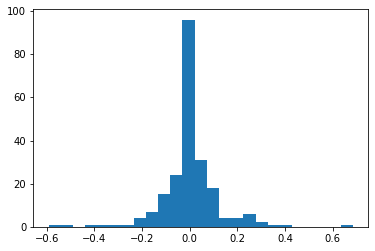

In [6]:
plt.hist(df['day1_Px_change'], bins=25)
df.describe()